In [1]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

plt.style.use('seaborn-dark')

In [2]:
my_inflamome = pd.read_excel(
    '../data/external/protein-network.XLS',
    sheet_name='My-Inflamome',
    names=['source', 'int', 'target'],
    dtype=str
)

In [3]:
my_inflamome[my_inflamome.isna().any(axis=1)]

,source,int,target
18,PTPRS,int,NaN


In [4]:
my_inflamome.fillna('None', inplace=True)

In [5]:
MyInflamome = nx.from_pandas_edgelist(my_inflamome)
polar = nx.circular_layout(MyInflamome)

In [6]:
traffic = nx.betweenness_centrality(MyInflamome, normalized=False)
node_degree = dict(MyInflamome.degree())
edge_betweenness = nx.edge_betweenness(MyInflamome, normalized=False)

In [7]:
high_traffic_proteins = pd.DataFrame.from_dict(traffic, orient='index', columns=['traffic'])
high_traffic_proteins.sort_values(by='traffic', ascending=False, inplace=True)

high_degree_proteins = pd.DataFrame.from_dict(node_degree, orient='index', columns=['degree'])
high_degree_proteins.sort_values(by='degree', ascending=False, inplace=True)

In [8]:
high_traffic_proteins.to_csv('../data/processed/high_traffic.csv')
high_degree_proteins.to_csv('../data/processed/high_degree.csv')

In [9]:
high_traffic_proteins.head(10)

,traffic
MYC,547049.736258
IKBKE,536202.574103
TRAF6,509684.484502
TP53,385270.293413
EGFR,360257.063464
TRAF2,253824.127253
MAP3K3,200735.515786
IKBKG,161129.531766
GRB2,151469.624922
UBC,146835.648754


In [10]:
high_degree_proteins.head(10)

,degree
TRAF6,347
IKBKE,342
MYC,330
TP53,194
EGFR,169
MAP3K3,166
NFKB2,147
IKBKG,144
TRAF2,138
RELA,137


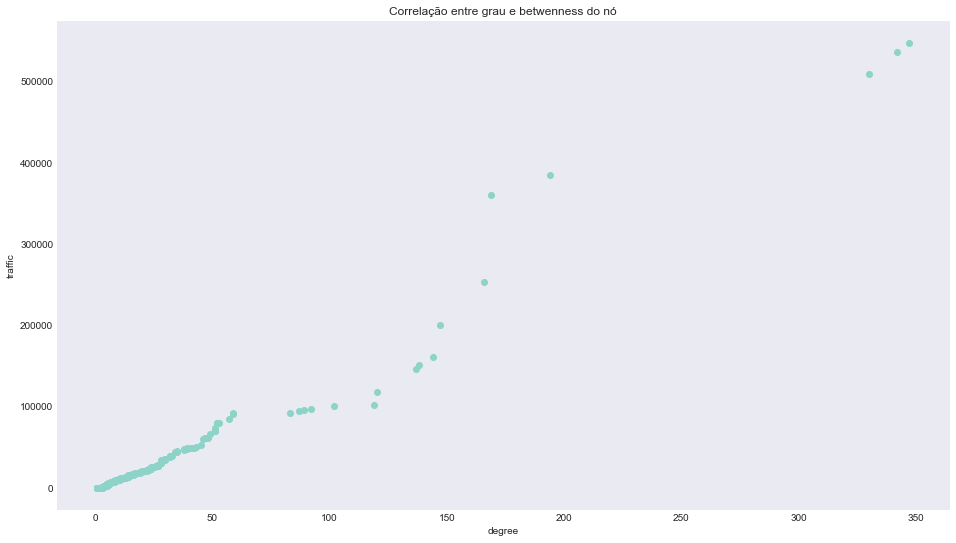

In [11]:
plt.figure(figsize=(16, 9))
plt.scatter(x=high_degree_proteins['degree'], y=high_traffic_proteins['traffic'])
plt.xlabel('degree')
plt.ylabel('traffic')
plt.title('Correlação entre grau e betwenness do nó')
plt.show()

In [12]:
from networkx.algorithms import community

In [20]:
communities_generator = community.greedy_modularity_communities(MyInflamome)

In [23]:
len(communities_generator)

25

In [30]:
communities = {f'Modulo {i}': list(c) for i, c in enumerate(communities_generator, start=1)}

In [31]:
communities['Modulo 20']

['RND1', 'PLXNB1', 'MRAS', 'RND3', 'SEMA4A']

In [33]:
with open('../data/processed/communities.json', 'w') as f:
    json.dump(communities, f)

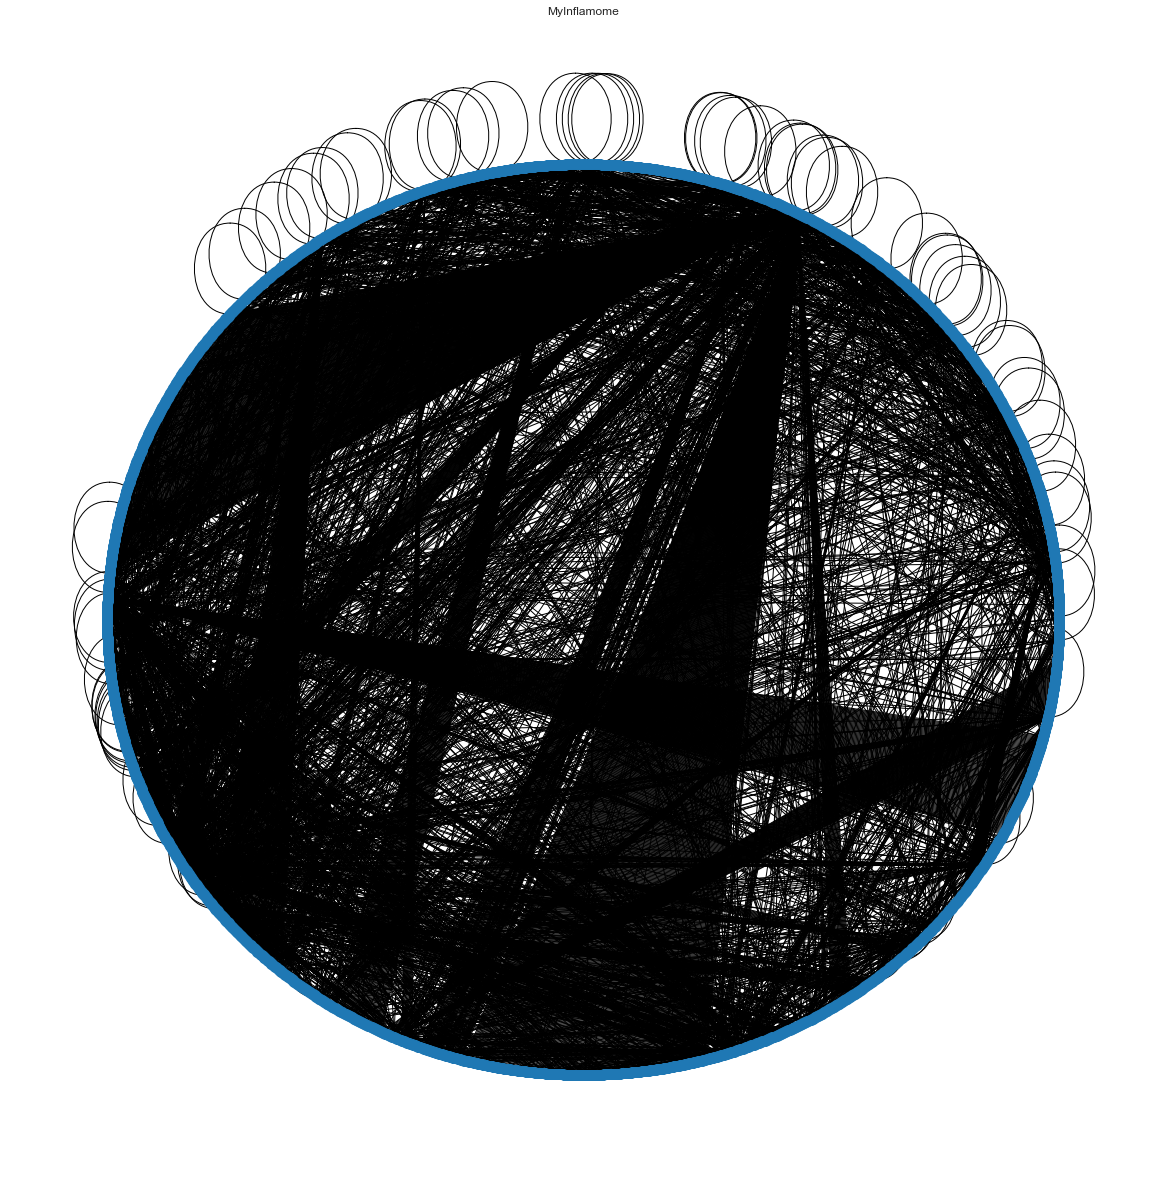

In [34]:
plt.figure(figsize=(16, 16))
nx.draw(MyInflamome, pos=polar, with_labels=False, node_size=100)
plt.title('MyInflamome')
plt.savefig('../graphics/MyInflamome.pdf')
plt.show()

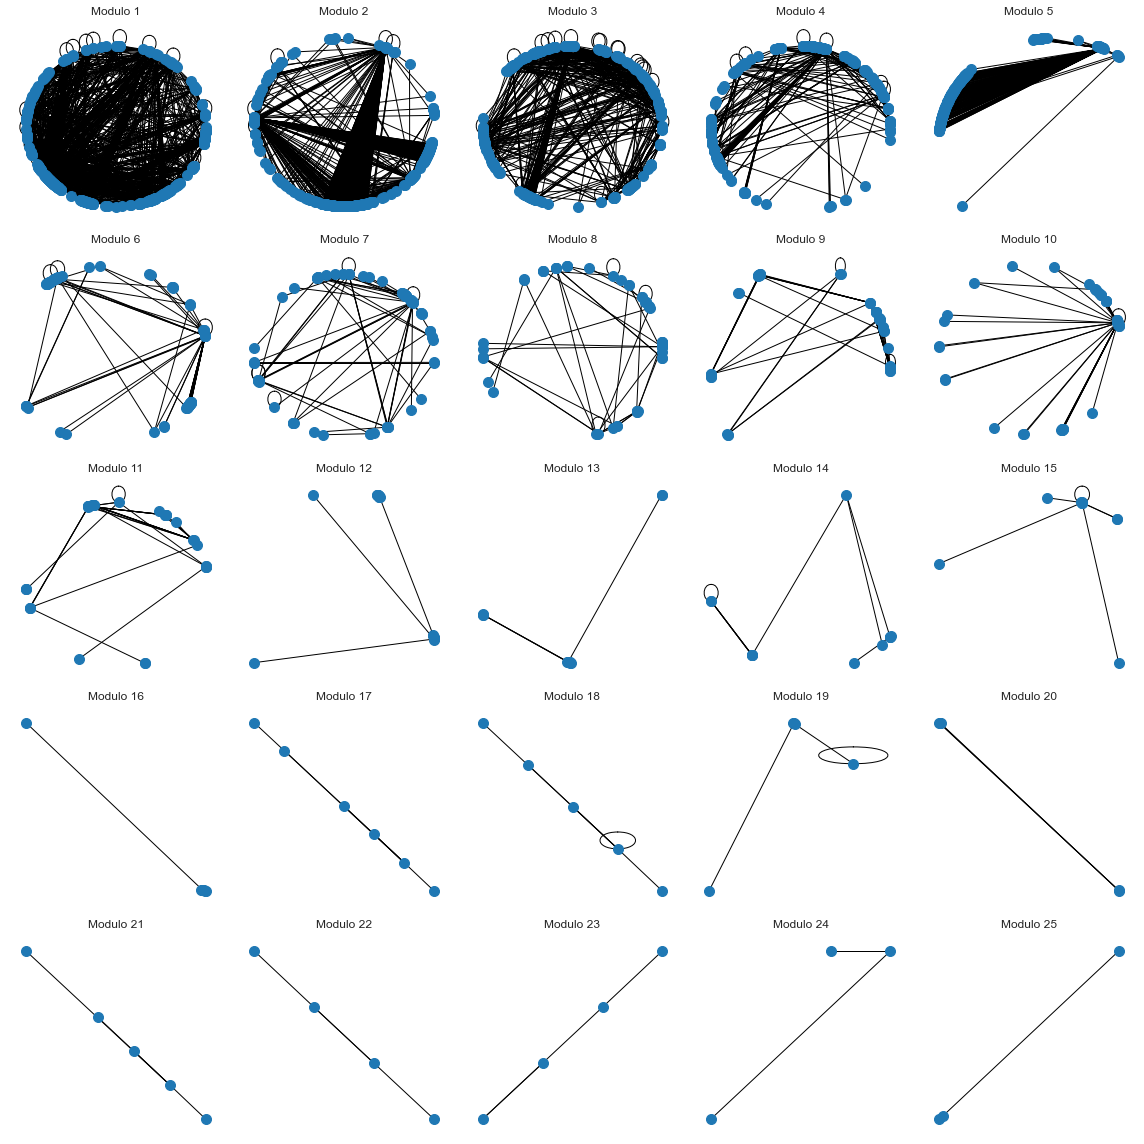

In [35]:
fig, axs = plt.subplots(
    nrows=5, ncols=5, figsize=(16, 16),
    subplot_kw={'xticks': [], 'yticks': []}
)

for i, (ax, module) in enumerate(zip(axs.flat, communities.items()), start=1):
    view = nx.subgraph_view(MyInflamome, filter_node=lambda x: x in module[1])
    ax.set_title(module[0])
    nx.draw(view, pos=polar, with_labels=False, node_size=100, ax=ax)

plt.tight_layout()
plt.savefig('../graphics/MyInflamome-modules.pdf')
plt.show()